In [3]:
"""
[1] Merge masks with different instruments into one binary mask
[2] Crop black borders from images and masks
"""
from pathlib import Path

from tqdm import tqdm
import cv2
import numpy as np

data_path = Path('C:/Users/Siyao/Downloads/EndoVis2017Data')

train_path = data_path / 'train'

cropped_train_path = data_path / 'cropped_train'

original_height, original_width = 1080, 1920
height, width = 1024, 1280
h_start, w_start = 28, 320

binary_factor = 255
parts_factor = 85
instrument_factor = 32


# if __name__ == '__main__':
for instrument_index in range(1, 9):
    instrument_folder = 'instrument_dataset_' + str(instrument_index)

    (cropped_train_path / instrument_folder / 'images').mkdir(exist_ok=True, parents=True)

    binary_mask_folder = (cropped_train_path / instrument_folder / 'binary_masks')
    binary_mask_folder.mkdir(exist_ok=True, parents=True)

    parts_mask_folder = (cropped_train_path / instrument_folder / 'parts_masks')
    parts_mask_folder.mkdir(exist_ok=True, parents=True)

    instrument_mask_folder = (cropped_train_path / instrument_folder / 'instruments_masks')
    instrument_mask_folder.mkdir(exist_ok=True, parents=True)

    mask_folders = list((train_path / instrument_folder / 'ground_truth').glob('*'))
    # mask_folders = [x for x in mask_folders if 'Other' not in str(mask_folders)]

    for file_name in tqdm(list((train_path / instrument_folder / 'left_frames').glob('*'))):
        img = cv2.imread(str(file_name))
        old_h, old_w, _ = img.shape

        img = img[h_start: h_start + height, w_start: w_start + width]
        cv2.imwrite(str(cropped_train_path / instrument_folder / 'images' / (file_name.stem + '.jpg')), img,
                    [cv2.IMWRITE_JPEG_QUALITY, 100])

        mask_binary = np.zeros((old_h, old_w))
        mask_parts = np.zeros((old_h, old_w))
        mask_instruments = np.zeros((old_h, old_w))

        for mask_folder in mask_folders:
            mask = cv2.imread(str(mask_folder / file_name.name), 0)

            if 'Bipolar_Forceps' in str(mask_folder):
                mask_instruments[mask > 0] = 1
            elif 'Prograsp_Forceps' in str(mask_folder):
                mask_instruments[mask > 0] = 2
            elif 'Large_Needle_Driver' in str(mask_folder):
                mask_instruments[mask > 0] = 3
            elif 'Vessel_Sealer' in str(mask_folder):
                mask_instruments[mask > 0] = 4
            elif 'Grasping_Retractor' in str(mask_folder):
                mask_instruments[mask > 0] = 5
            elif 'Monopolar_Curved_Scissors' in str(mask_folder):
                mask_instruments[mask > 0] = 6
            elif 'Other' in str(mask_folder):
                mask_instruments[mask > 0] = 7

            if 'Other' not in str(mask_folder):
                mask_binary += mask

                mask_parts[mask == 10] = 1  # Shaft
                mask_parts[mask == 20] = 2  # Wrist
                mask_parts[mask == 30] = 3  # Claspers

        mask_binary = (mask_binary[h_start: h_start + height, w_start: w_start + width] > 0).astype(
            np.uint8) * binary_factor
        mask_parts = (mask_parts[h_start: h_start + height, w_start: w_start + width]).astype(
            np.uint8) * parts_factor
        mask_instruments = (mask_instruments[h_start: h_start + height, w_start: w_start + width]).astype(
            np.uint8) * instrument_factor

        cv2.imwrite(str(binary_mask_folder / file_name.name), mask_binary)
        cv2.imwrite(str(parts_mask_folder / file_name.name), mask_parts)
        cv2.imwrite(str(instrument_mask_folder / file_name.name), mask_instruments)


100%|██████████| 225/225 [00:28<00:00,  8.02it/s]


In [90]:
"""
[1] Merge masks with different instruments into one binary mask
[2] Crop black borders from images and masks
"""
from pathlib import Path

from tqdm import tqdm
import cv2
import numpy as np

data_path = Path('C:/Users/Siyao/Downloads/EndoVis2017Data')

test_path = data_path / 'test'

cropped_test_path = data_path / 'cropped_test'

original_height, original_width = 1080, 1920
height, width = 1024, 1280
h_start, w_start = 28, 320

binary_factor = 255
parts_factor = 85
instrument_factor = 32


# if __name__ == '__main__':
for instrument_index in range(1, 11):
    instrument_folder = 'instrument_dataset_' + str(instrument_index)

    (cropped_test_path / instrument_folder / 'images').mkdir(exist_ok=True, parents=True)

    binary_mask_folder = (cropped_test_path / instrument_folder / 'binary_masks')
    binary_mask_folder.mkdir(exist_ok=True, parents=True)

    parts_mask_folder = (cropped_test_path / instrument_folder / 'parts_masks')
    parts_mask_folder.mkdir(exist_ok=True, parents=True)

    instrument_mask_folder = (cropped_test_path / instrument_folder / 'instruments_masks')
    instrument_mask_folder.mkdir(exist_ok=True, parents=True)

    mask_folders = list((test_path / instrument_folder / 'ground_truth').glob('*'))
    # mask_folders = [x for x in mask_folders if 'Other' not in str(mask_folders)]

    for file_name in tqdm(list((test_path / instrument_folder / 'left_frames').glob('*'))):
        img = cv2.imread(str(file_name))
        old_h, old_w, _ = img.shape

        img = img[h_start: h_start + height, w_start: w_start + width]
        cv2.imwrite(str(cropped_test_path / instrument_folder / 'images' / (file_name.stem + '.jpg')), img,
                    [cv2.IMWRITE_JPEG_QUALITY, 100])

        binary_name = file_name.parent.parent / 'BinarySegmentation' / (file_name.stem + '.png') 
        parts_name = file_name.parent.parent / 'PartsSegmentation' / (file_name.stem + '.png')
        instruments_name = file_name.parent.parent / 'TypeSegmentation' / (file_name.stem + '.png') 

        mask_binary = cv2.imread(str(binary_name)) / binary_factor
        mask_parts = cv2.imread(str(parts_name))
        mask_instruments = cv2.imread(str(instruments_name))

        mask_parts[mask_parts==30] = 1  # Shaft
        mask_parts[mask_parts==100] = 2  # Wrist
        mask_parts[mask_parts==255] = 3  # Claspers


        mask_binary = (mask_binary[h_start: h_start + height, w_start: w_start + width] ).astype(
            np.uint8) * binary_factor
        mask_parts = (mask_parts[h_start: h_start + height, w_start: w_start + width]).astype(
            np.uint8) * parts_factor
        mask_instruments = (mask_instruments[h_start: h_start + height, w_start: w_start + width]).astype(
            np.uint8) * instrument_factor

        cv2.imwrite(str(binary_mask_folder / file_name.name), mask_binary)
        cv2.imwrite(str(parts_mask_folder / file_name.name), mask_parts)
        cv2.imwrite(str(instrument_mask_folder / file_name.name), mask_instruments)


100%|██████████| 300/300 [00:41<00:00,  7.23it/s]


In [87]:
frame_name = Path("C:/Users/Siyao/Downloads/EndoVis2017Data/test/instrument_dataset_1/left_frames/frame225.png")
binary_name = frame_name.parent.parent / 'BinarySegmentation' / (file_name.stem + '.png') 
binary_name

WindowsPath('C:/Users/Siyao/Downloads/EndoVis2017Data/test/instrument_dataset_1/BinarySegmentation/frame225png')

In [15]:
from pathlib import Path
import matplotlib.pyplot as plt 
from tqdm import tqdm
import cv2
import numpy as np
import torch

In [48]:
imagefile = Path("C:/Users/Siyao/Downloads/EndoVis2017Data/test/instrument_dataset_1/TypeSegmentationRescaled/frame259.png")
# imagefile.parent.parent / "left_frames" / "frame225.png"
imagefile.stem

'frame259'

(torch.Size([1080, 1920, 3]), tensor([  0,  30, 100, 255], dtype=torch.uint8))

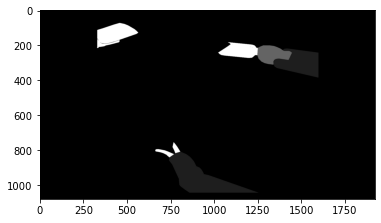

In [84]:
mask_ins = cv2.imread("C:/Users/Siyao/Downloads/EndoVis2017Data/test/instrument_dataset_9/PartsSegmentation/frame139.png")
# mask_ins = cv2.imread("C:/Users/Siyao/Downloads/EndoVis2017Data/cropped_train/instrument_dataset_5/parts_masks/frame117.png")

mask_ins = torch.from_numpy(mask_ins)
plt.imshow(mask_ins)
mask_ins.shape, mask_ins.unique()

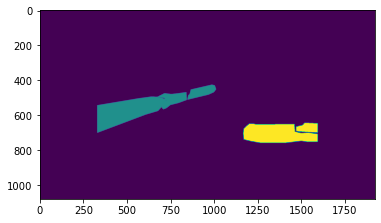

In [36]:
mask_ins.unique()
mask_ins_2d = torch.sum(mask_ins, dim=2)
mask_ins_2d.unique()
plt.imshow(mask_ins_2d*32)

## ENDOVIS2018 Label Convert

In [22]:
import json
import torch
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt 


data_path = Path("C:/Users/Siyao/Downloads/MICCAI2018")

labels_json = data_path / 'labels.json'
with open(labels_json) as file:
    labels_map = json.load(file)
    
cmap = {}
for item in labels_map:
    color = item['color']
    color.reverse()
    classid = item['classid']
    cmap[tuple(color)] = classid

for rgb in cmap:
    if cmap[rgb] > 3:
        cmap[rgb] = 0

def rgb2msk(label):
    mask = np.zeros(label.shape[:2], dtype=np.int8)
    for rgb in cmap:
        mask[(label==rgb).all(axis=2)] = cmap[rgb]
    return mask

for seq_id in range(1,17):
    seq_folder = data_path / ('seq_' + str(seq_id))
    gt_folder = (seq_folder / 'masks')
    gt_folder.mkdir(exist_ok=True, parents=True)
    for file_name in tqdm(list((data_path / ('seq_' + str(seq_id)) / 'left_frames').glob('*'))):
        label = cv2.imread(str(file_name).replace('left_frames', 'labels'))
        mask = rgb2msk(label)
        cv2.imwrite(str(gt_folder / file_name.name), mask)


100%|██████████| 149/149 [00:32<00:00,  4.62it/s]
0it [00:00, ?it/s]
100%|██████████| 149/149 [00:32<00:00,  4.54it/s]


In [17]:
seq_id = 1
seq_folder = data_path / ('seq_' + str(seq_id))
gt_folder = (seq_folder / 'masks')
file = gt_folder / 'frame001.png'
label = cv2.imread(str(file).replace('masks', 'labels'))
mask = rgb2msk(label)
cv2.imwrite(str(gt_folder / file.name), mask)

True

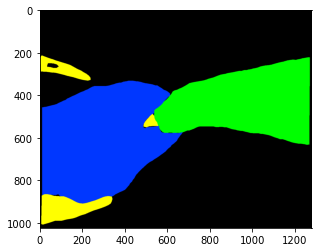

In [12]:
plt.imshow(label)

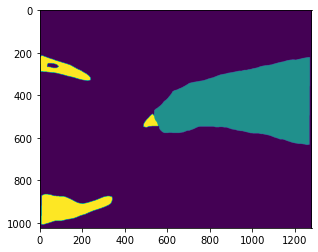

In [21]:
saved = cv2.imread(str(gt_folder / file.name),cv2.IMREAD_UNCHANGED)
saved.shape
plt.imshow(saved)